### Imports

In [146]:
import numpy as np
import pandas as pd
import pylab as pl
import statsmodels.formula.api as smf
from scipy import stats

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Data

In [24]:
allmales = {
    'all': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_2_1_' + '1' + '.xls', header = 9),
    'white': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_2_1_' + '4' + '.xls', header = 9),
    'black': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_2_1_' + '6' + '.xls', header = 9),
    'hispanic': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_2_1_' + '9' + '.xls', header = 9),
    'asian': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_2_1_' + '8' + '.xls', header = 9)}

allfemales = {
    'all': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_3_1_' + '1' + '.xls', header = 9),
    'white': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_3_1_' + '4' + '.xls', header = 9),
    'black': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_3_1_' + '6' + '.xls', header = 9),
    'hispanic': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_3_1_' + '9' + '.xls', header = 9),
    'asian': pd.read_excel('http://cosmo.nyu.edu/~fb55/PUI2016/data/' + 'pinc08_3_1_' + '8' + '.xls', header = 9)}

In [25]:
allfemales['white'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,74382.0,5138.0,2524.0,3328.0,4861.0,5221.0,3831.0,4495.0,2875.0,...,146.0,220.0,145.0,3426.0,23780,298,34014,327,0.494,0.0033
2,Earnings,49073.0,2830.0,2002.0,2004.0,1648.0,2850.0,1141.0,2404.0,1490.0,...,44.0,174.0,97.0,2677.0,30626,205,38518,413,0.467,0.0044
3,..Wages and Salary,46694.0,2552.0,1867.0,1825.0,1490.0,2665.0,1116.0,2251.0,1440.0,...,47.0,167.0,96.0,2539.0,30919,203,38758,418,0.46,0.0044
4,..Nonfarm Self-Employment,3386.0,978.0,221.0,298.0,162.0,257.0,54.0,171.0,83.0,...,0.0,0.0,0.0,107.0,10328,602,22080,1453,0.673,0.0201


In [27]:
for keys, values in allmales.items():
    print("Males", keys)
    print(values.describe())
    
for keys, values in allfemales.items():
    print("Females", keys)
    print(values.describe())

('Males', 'hispanic')
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2170.521739            229.086957         89.065217   
std          4613.142818            568.574742        127.425168   
min             2.000000              0.000000          0.000000   
25%                  NaN                   NaN               NaN   
50%                  NaN                   NaN               NaN   
75%                  NaN                   NaN               NaN   
max         16484.000000           2762.000000        472.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         113.478261        118.500000          134.130435   
std          189.010375        204.980189          259.457092   
min            0.000000          0.000000            0.000000   
25%                 NaN               Na

### 2. Exploratory analysis 

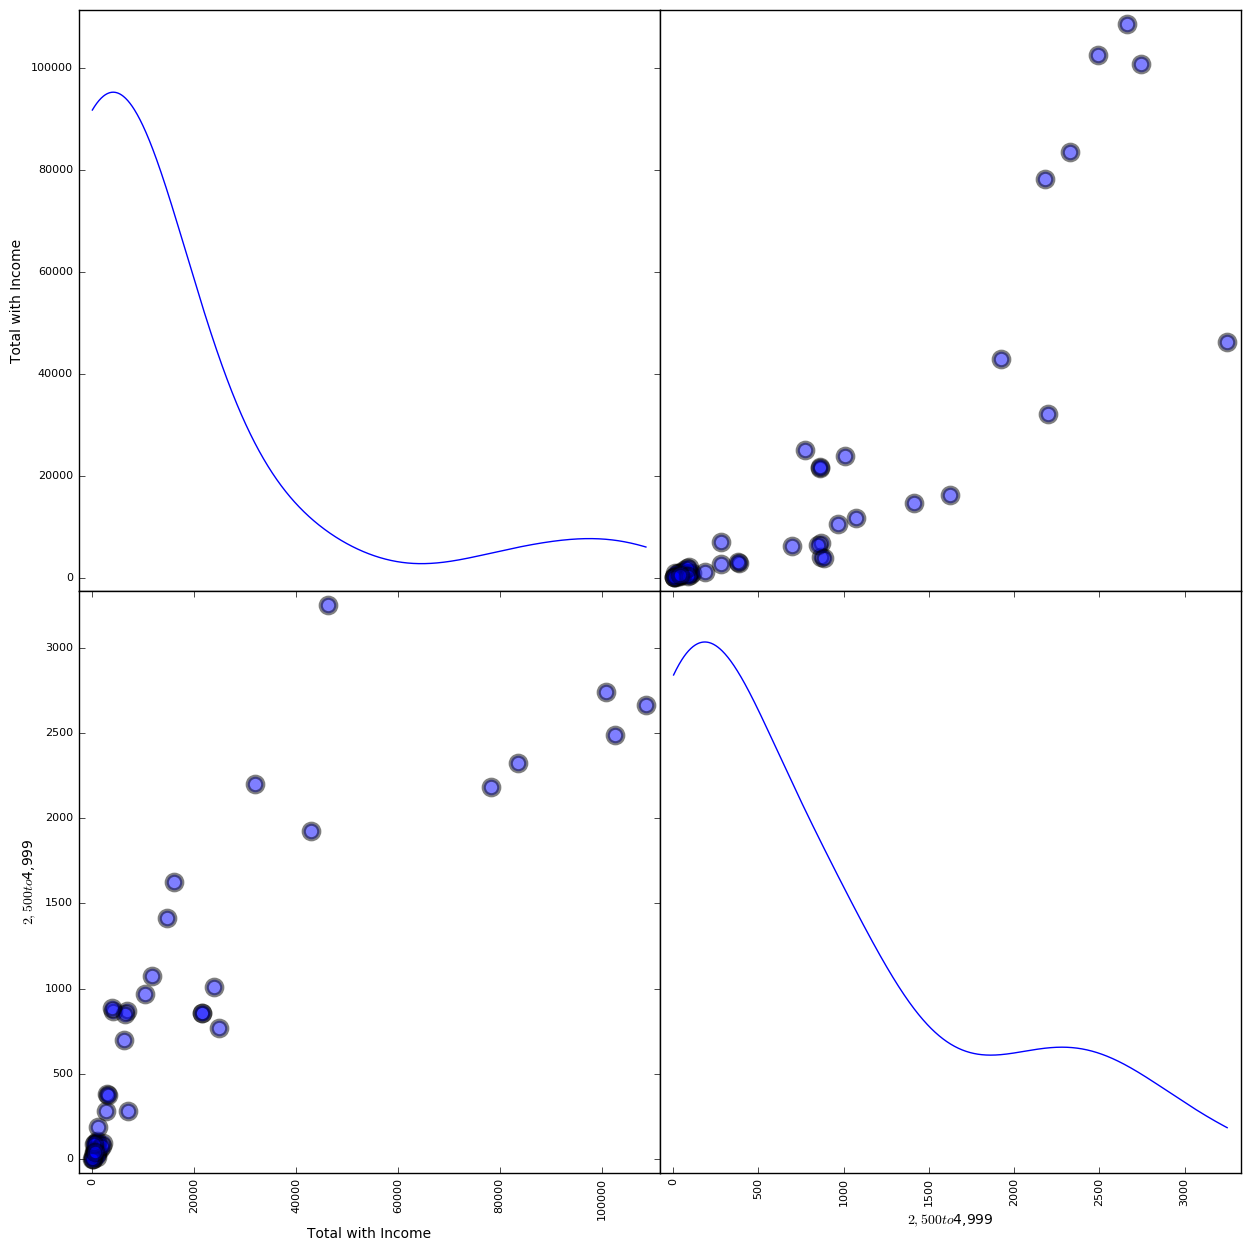

In [28]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')

In [31]:
print (allmales['all'].shape)

(49, 49)


In [32]:
allmales['all'].applymap(np.isreal).sum()

Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

### 3. Male v. Female median income

In [138]:
x = [allmales['all'][u'Median income'][1], allmales['white'][u'Median income'][1], 
     allmales['black'][u'Median income'][1], allmales['hispanic'][u'Median income'][1], 
     allmales['asian'][u'Median income'][1]]

y = [allfemales['all'][u'Median income'][1], allfemales['white'][u'Median income'][1], 
     allfemales['black'][u'Median income'][1], allfemales['hispanic'][u'Median income'][1], 
     allfemales['asian'][u'Median income'][1]]

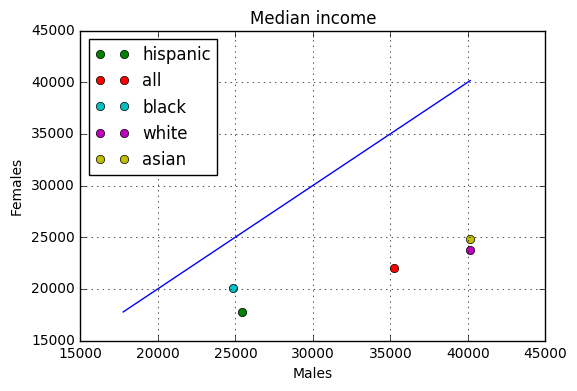

In [194]:
equal_line = np.arange(min(y), max(x), 0.1)
pl.plot(equal_line, equal_line)

for i in allmales:
    pl.plot(allmales[i][u'Median income'][1], allfemales[i][u'Median income'][1], 'o', label = i)

pl.xlabel('Males'), pl.ylabel('Females'), pl.title('Median income')
pl.legend(loc = 'upper left')
pl.grid()

The plot above indicates that the total median income of females is lower than the median income of males across all races. Also, the difference in the total median income of males and females is greater at higher income levels. 

### 4. Regression model

In [166]:
# My regression

data = pd.DataFrame([x, y], index = ['x', 'y']).T
data

,x,y
0,35228,22063
1,40122,23780
2,24855,20044
3,25411,17762
4,40153,24840


In [167]:
lm = smf.ols(formula = 'y ~ x', data = data).fit()

In [169]:
lm.params

Intercept    9989.844408
x               0.353141
dtype: float64

In [148]:
# Using Federica's code to fit the analytical regression line

all_males = np.array([0., allmales['all']['Median income'][1], allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1], allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females = np.array([0.] + [allfemales[k]['Median income'][1]
                               for k in ['all', 'white', 'black', 'hispanic', 'asian']])

corr = stats.spearmanr(all_males, all_females)
beta1 = corr[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

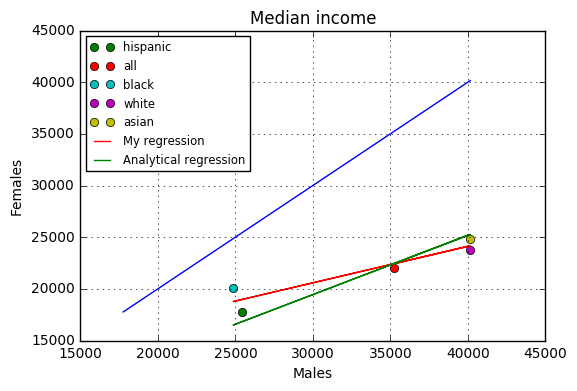

In [193]:
# Plotting

equal_line = np.arange(min(y), max(x), 0.1)
pl.plot(equal_line, equal_line)

for i in allmales:
    pl.plot(allmales[i][u'Median income'][1], allfemales[i][u'Median income'][1], 'o', label = i)

pl.plot(data.x, lm.predict(), 'r', label = 'My regression')
pl.plot(data.x, beta0 + beta1 * data.x, 'g', label = 'Analytical regression')
pl.xlabel('Males'), pl.ylabel('Females'), pl.title('Median income')
pl.legend(loc = 'best', fontsize = 'small')
pl.grid()

### 5. Regression model with other sources of income